# Wine Reviews

## Table of Contents
<ul>
<li><a href="#description">Dataset Description</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul><a href="#Assessing">1 - Assessing Data</a></ul>
    <ul><a href="#Cleaning">2 - Cleaning Data</a></ul>
<li><a href="#exploratory">Exploratory Data Analysis and Visualization</a></li>
</ul>

<a id='description'></a>
## Dataset Description:

> In this project we'll be analyzing data associated with information about Wine Reviews.

> <b>the dataset includes:</b>
>
>> <b>130k rows of wine reviews.</b> , and <b>10 variables</b>
>
>><b>Variables meaning:</b>
>>
>><b>1 - Country:</b>  The country that the wine is from.
>>
>><b>2 - Description</b>.
>>
>><b>3 - Designation:</b> The vineyard within the winery where the grapes that made the wine are from points.
>>
>><b>4 - Points:</b> The number of points WineEnthusiast rated the wine on a sclae of 1-100 (through they say they only post reviews for wines that score >=80).
>>
>><b>5 - Price:</b> The cost for a bottle of the wine.
>>
>><b>6 - Province:</b> The province or state that the wine is from.
>>
>><b>7 - region_1:</b> The wine growing area in a province or state (ie Napa).
>>
>><b>8 - region_2:</b> Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
>>
>><b>9 - taster_name</b>. 
>>
>><b>10 - taster_twitter_handle</b>.
>>
>><b>11 - title:</b> The title of the wine review, which often contains the vintage if you're interested in extracting the feature.
>>
>><b>12 - variety:</b> The type of graps used to make the wine (ie Pinot Nior).
>>
>><b>13 - winery:</b> The winery that made the wine.
>>


In [86]:
# Importing needed packages.
import pandas as pd 
import numpy as np

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

<a id='wrangling'></a>
## Data Wrangling:

Here we are going to do 2 steps:
>1- <b>Assessing Data:</b> exploring data and giving comments over all the weired, wrong, and missing values in the data.
>
>2- <b>Cleaning data:</b> clean the data by using the comments we wrote.

<a id='Assessing'></a>
### 1 - Assessing Data

In [88]:
# load in the dataset into a pandas dataframe, print statistics.
file_name = "winemag-data-130k-v2.csv.zip"
reviews = pd.read_csv(file_name, index_col=0)

In [89]:
#check the columns
reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [90]:
# high-level overview of data shape and composition
reviews.shape

(129971, 13)

In [91]:
# see more informations
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [92]:
# describe data
reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


><b>Comment:</b> 
>
>-the maximum and minimum values of points shows that there is no out laiers, as mentioned in the description of dataset above that the reviews which have points more than 80 point was taken in the consideration.
>
>-also the price from the maximum value and the minimum value is seems that there is no outlaiers , but we can make douple check for the minimum value later.

In [93]:
#check for the number of unique values in each column
reviews.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [94]:
#check for null values in a dataset
reviews.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

><b>Comment:</b> 
>
>-there is null values , but most of them are associated with non importanat variabes so we can simply **droping these columns** like **(region_1, region_2, taster_name, taster_twitter_handle )**. 
>
>-And some of them are associated with important variables ,  like **(price, country, province, and designation)**, these null values are too small compared with the data size we have so we can simply **drop these rows**.

In [95]:
#check for duplicates
reviews.duplicated().sum()

9983

> <b>Comment:</b>
>
> -<b>there is duplicated rows</b>, there number is not large, we can simply drop them from the dataset.

In [96]:
reviews.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
101233,US,"Tart and tannic, this has a sleek, almost stee...",Sentience,89,55.0,Oregon,Applegate Valley,Southern Oregon,Paul Gregutt,@paulgwine,Cowhorn 2011 Sentience Syrah (Applegate Valley),Syrah,Cowhorn
14021,Argentina,"Honeyed, floral aromas include bright citrus a...",NaN,88,NaN,Other,Neuquén,NaN,Michael Schachner,@wineschach,Quimay 2015 Chardonnay (Neuquén),Chardonnay,Quimay
81380,Australia,How can a Barossa Shiraz be so green? Its flav...,Sinner's,82,23.0,South Australia,Barossa Valley,NaN,Joe Czerwinski,@JoeCz,Yunbar 2000 Sinner's Shiraz (Barossa Valley),Shiraz,Yunbar
27318,Italy,"Aromas include white spring flowers, apples an...",Eichhorn,89,NaN,Northeastern Italy,Alto Adige Terlano,NaN,Kerin O’Keefe,@kerinokeefe,Manincor 2012 Eichhorn Pinot Bianco (Alto Adig...,Pinot Bianco,Manincor
116074,Portugal,"Grande in all senses, this wine comes in a pow...",Grande Rocim Reserva,90,NaN,Alentejo,NaN,NaN,Roger Voss,@vossroger,Herdade do Rocim 2009 Grande Rocim Reserva Red...,Portuguese Red,Herdade do Rocim


--------------------------------------------------------------------------------------------------------

<a id='Cleaning'></a>
### 2 - Cleaning Data

Data that we are going to clean :

>-Drop **un-needed columns**. Most if the **NaN values** are found in specific columns like **"region_1"**, **"region_2"**, **"taster_name"**, **"taster_twitter_handle"**.
>
>-Drop **NaN values** in the other columns, these null values are too small compared with the data size so we can simply drop these rows .
>
>-Drop **Duplicates** in the data.

In [97]:
# Drop the un-needed columns
reviews.drop(['region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], axis=1, inplace = True)

# dropping ALL missing values 
reviews.dropna(axis=0, how='any',inplace=True)

# dropping ALL duplicte values 
reviews.drop_duplicates( keep ="first" , inplace = True)

#reset the index of the original_df
reviews.reset_index(drop=True,inplace=True)

In [98]:
#Explore data after wrangling
print(reviews.shape)

reviews.sample(5)

(79488, 9)


,country,description,designation,points,price,province,title,variety,winery
40154,Italy,"Scents of Spanish broom, pineapple, orchard fr...",Chianta Bianco,90,45.0,Sicily & Sardinia,Biondi 2014 Chianta Bianco (Etna),White Blend,Biondi
7807,US,This light-bodied wine brings enjoyment at a v...,Willow Springs,86,7.0,California,CK Mondavi 2014 Willow Springs Pinot Grigio (C...,Pinot Grigio,CK Mondavi
41338,US,"While initially a bit smoky, or even slightly ...",Dry,86,16.0,New York,Hosmer 2015 Dry Rosé (Cayuga Lake),Rosé,Hosmer
38793,Spain,"Starts out heavy and roasted, with herbal, ear...",Dominio de Heredia,84,15.0,Northern Spain,Altanza 2008 Dominio de Heredia (Rioja),Tempranillo,Altanza
9274,US,Made in the modern way of very ripe fruit and ...,San Saba Vineyard,87,49.0,California,Wrath 2008 San Saba Vineyard Chardonnay (Monte...,Chardonnay,Wrath


--------------------------------------------------------------------------------------------------------

<a id='exploratory'></a>
## Exploratory Data Analysis and Visualization

> Using these types of ploting:
>>-scatter plot
>>
>>-choropleth plot
>>
>>-heatmap
>>
>>-surface plot


# Scatterplot

In [99]:
import plotly
import plotly.graph_objs as go

In [100]:
# Create a trace
trace = go.Scatter(
    x = reviews['points'],
    y =  reviews['price'],
    mode = 'markers'
)
data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.plot(data, filename='basic-scatter')
#plotly.offline.plot(reviews, filename='Untitled.html')

F:\Anaconda_new_Installation\envs\my_env\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `basic-scatter` didn't end with .html. Adding .html to the end of your file.



'basic-scatter.html'

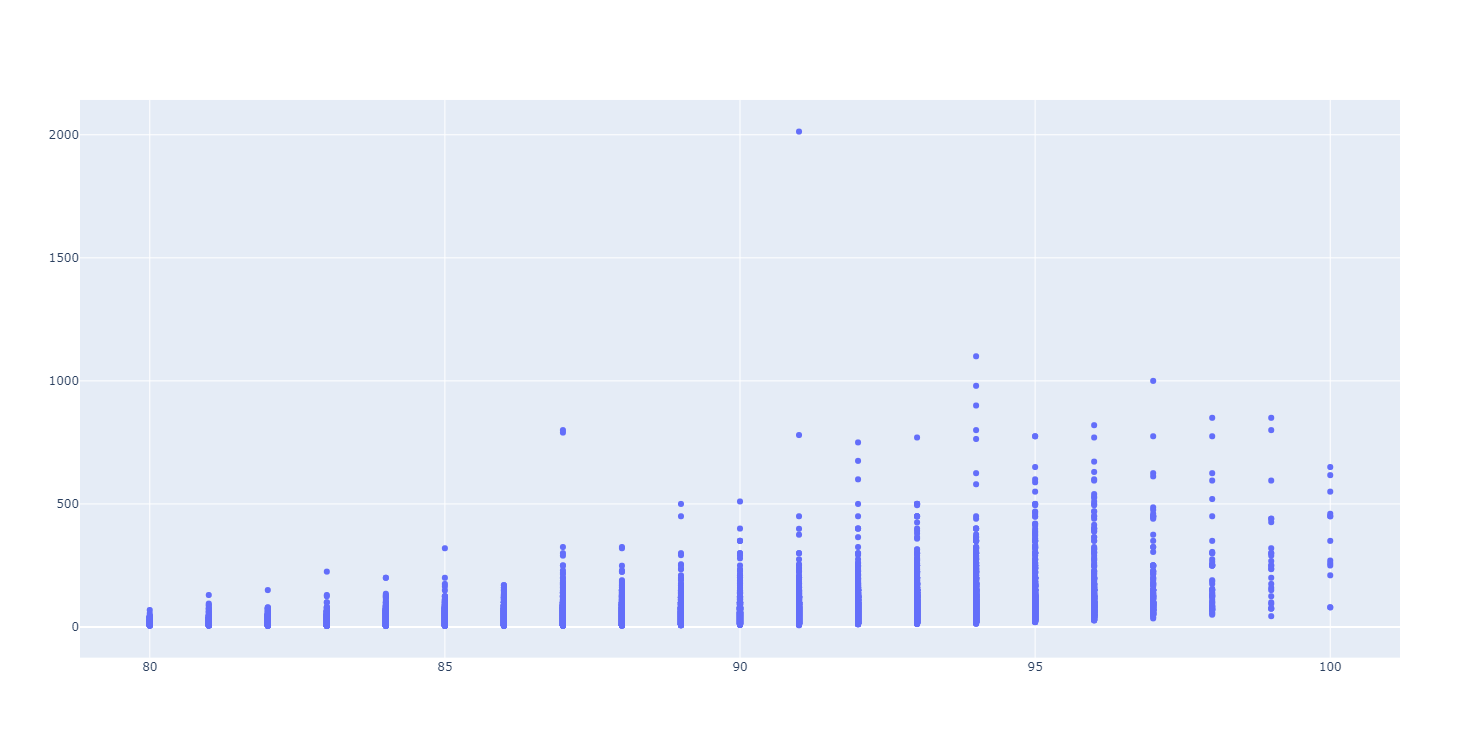

>**Comment:**
>
> this is shows us that there is a weak positive correlation no between the number of points and the price of wine , as we see there is wines that have alot of points while their price is low , and there is wines have a small number of points but their price is large.
>
>let's check that imformation by measuring the correlation between theses two variables.

In [101]:
from scipy.stats import pearsonr

corr, _ = pearsonr(reviews['points'], reviews['price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.458


>**Comment:**
>
> our observation was right, there is a weak positive correlation bretween thses two variables.

# Heatmap

In [102]:
reviews[['points', 'price']]
reviews['pointss']=reviews['points']

get_relation=reviews.groupby(['pointss']).mean()
new_list=reviews[['points', 'price']].head(100).values.tolist()
new_list=reviews.groupby(['points']).mean().values.tolist()

In [103]:
new_list

[[17.369477911646587, 80.0],
 [18.781407035175878, 81.0],
 [20.05278310940499, 82.0],
 [19.126084441873914, 83.0],
 [20.099803756658257, 84.0],
 [20.920739762219288, 85.0],
 [23.035097731488086, 86.0],
 [26.169040835707502, 87.0],
 [29.92153657539845, 88.0],
 [33.26119402985075, 89.0],
 [38.67840670859539, 90.0],
 [44.76043841336117, 91.0],
 [52.19058858238678, 92.0],
 [63.346538782318596, 93.0],
 [78.70326201332865, 94.0],
 [97.97662337662338, 95.0],
 [128.70780856423173, 96.0],
 [157.36774193548388, 97.0],
 [211.64, 98.0],
 [279.7307692307692, 99.0],
 [359.6923076923077, 100.0]]

In [104]:
from plotly import tools
import plotly
import plotly.graph_objs as go

trace0 = go.Contour(
    z=new_list,
    line=dict(smoothing=0),
)

trace1 = go.Contour(
    z=new_list,
    line=dict(smoothing=0.85),
)

data = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=('Without Smoothing', 'With Smoothing'))

data.append_trace(trace0, 1, 1)
data.append_trace(trace1, 1, 2)

#plotly.offline.plot(data)
plotly.offline.plot(data, filename='Heat_map')
#plotly.offline.plot(data, filename='Heat_map.html')

F:\Anaconda_new_Installation\envs\my_env\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

F:\Anaconda_new_Installation\envs\my_env\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `Heat_map` didn't end with .html. Adding .html to the end of your file.



'Heat_map.html'

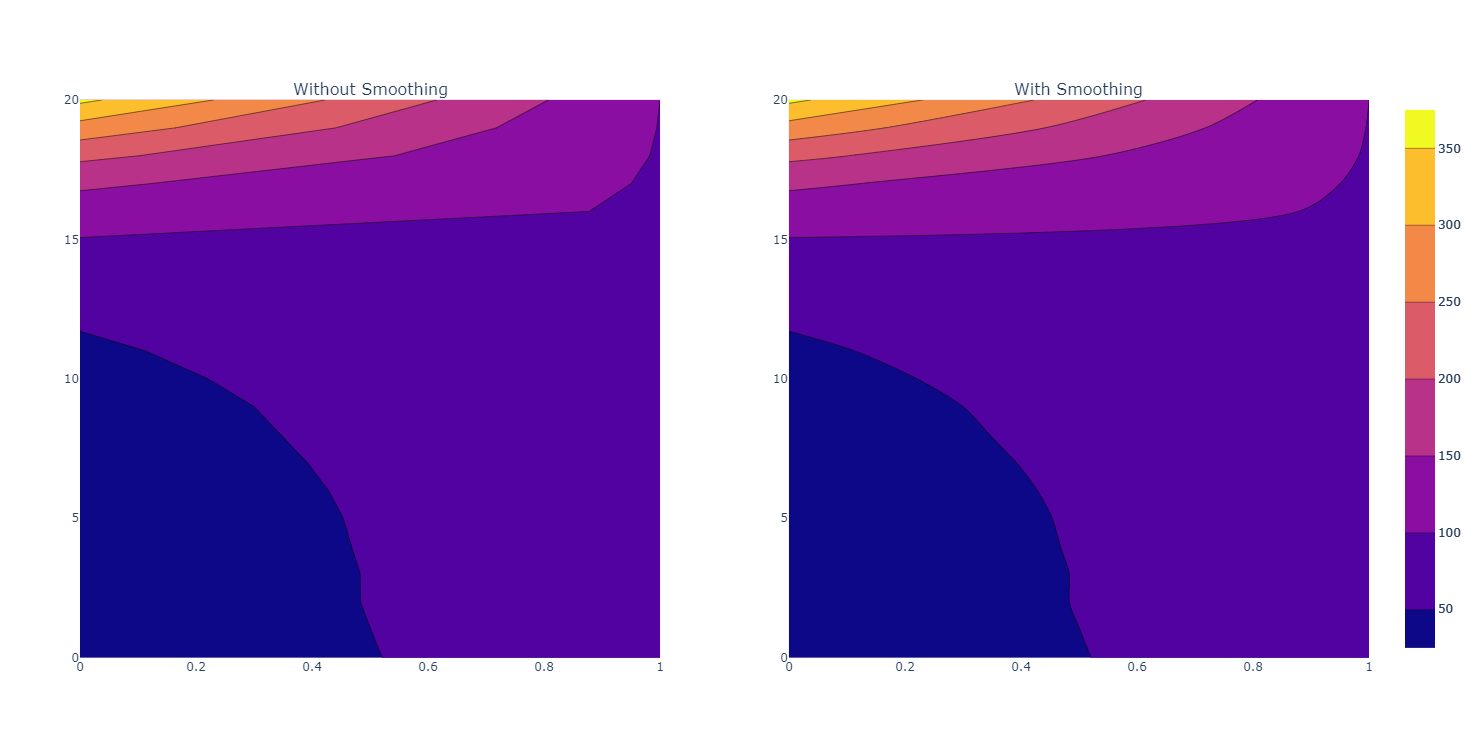

>**Comment:**
>
> also these correlation appeared in the heat map that shows us that there is a weak correlation between these two variables.
as the number of records is too large , i got the average of prices for each point and then got the correlation between the averages and the points.

# Choropleth plot

In [105]:
reviews['country_counts']=reviews['country']

In [106]:
grouped_df = reviews.groupby("country")

In [107]:
grouped_df

In [108]:
function_dict = {"country_counts": "count", "price": "mean", "points":"mean"}

In [109]:
grouped_df = grouped_df.aggregate(function_dict)

In [110]:
grouped_df

,country_counts,price,points
country,,,
Argentina,2655,26.999623,87.076836
Armenia,2,14.500000,87.500000
Australia,1523,41.172685,88.986868
Austria,2161,33.261453,90.480796
Bosnia and Herzegovina,1,13.000000,85.000000
Brazil,43,24.604651,84.534884
Bulgaria,88,16.068182,87.784091
Canada,156,40.211538,89.333333
Chile,3575,21.479161,86.622937


In [111]:
grouped_df['country']=grouped_df.index

In [112]:
data = dict(type = 'choropleth',
            locations = grouped_df['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Rainbow',
            text= grouped_df['country'],
            z=grouped_df['price'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':'Colour Range','len':0.25,'lenmode':'fraction'})

layout = dict(geo = dict(scope='world'))

worldmap = go.Figure(data = [data],layout = layout)


#plotting the map
plotly.offline.plot(worldmap, filename='Choropleth_plot')

F:\Anaconda_new_Installation\envs\my_env\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `Choropleth_plot` didn't end with .html. Adding .html to the end of your file.



'Choropleth_plot.html'

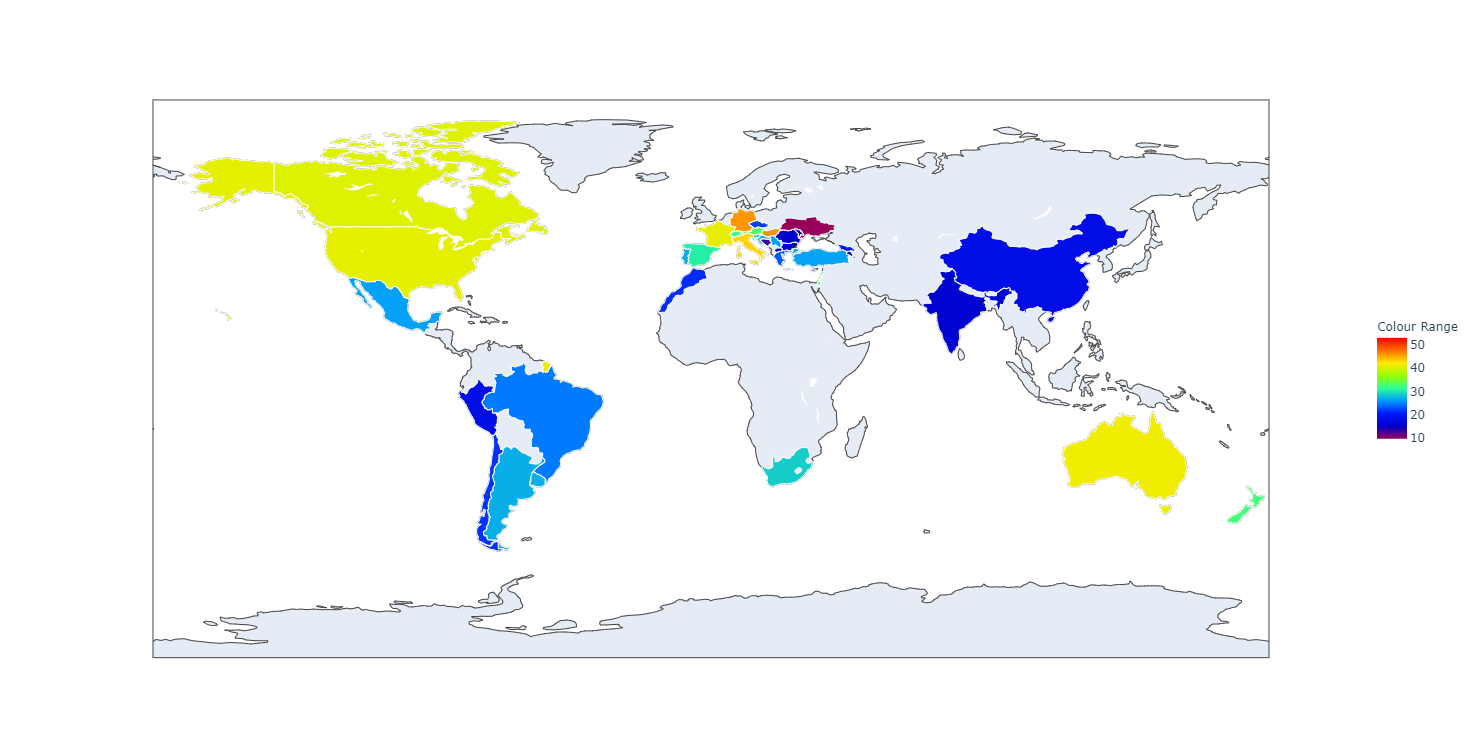

>**Comment:**
>
> that showes us that the Ukraine wines are the lowest prices , and England wines are the most top prices .

# Surface_plot

### 1st try 

In [113]:
df=grouped_df[['price','points']]
df

,price,points
country,,
Argentina,26.999623,87.076836
Armenia,14.500000,87.500000
Australia,41.172685,88.986868
Austria,33.261453,90.480796
Bosnia and Herzegovina,13.000000,85.000000
Brazil,24.604651,84.534884
Bulgaria,16.068182,87.784091
Canada,40.211538,89.333333
Chile,21.479161,86.622937


In [114]:
x=df['price'].values
y=df['points'].values
z = np.column_stack((df['price'], df['points']))
data = [{'x': x,
         'y': y,
         'z': z,
         'type': 'surface'}]

#plot({'data': data})
#plotly.offline.plot(data)
plotly.offline.plot(data,filename='surface_plot_1' )

F:\Anaconda_new_Installation\envs\my_env\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `surface_plot_1` didn't end with .html. Adding .html to the end of your file.



'surface_plot_1.html'

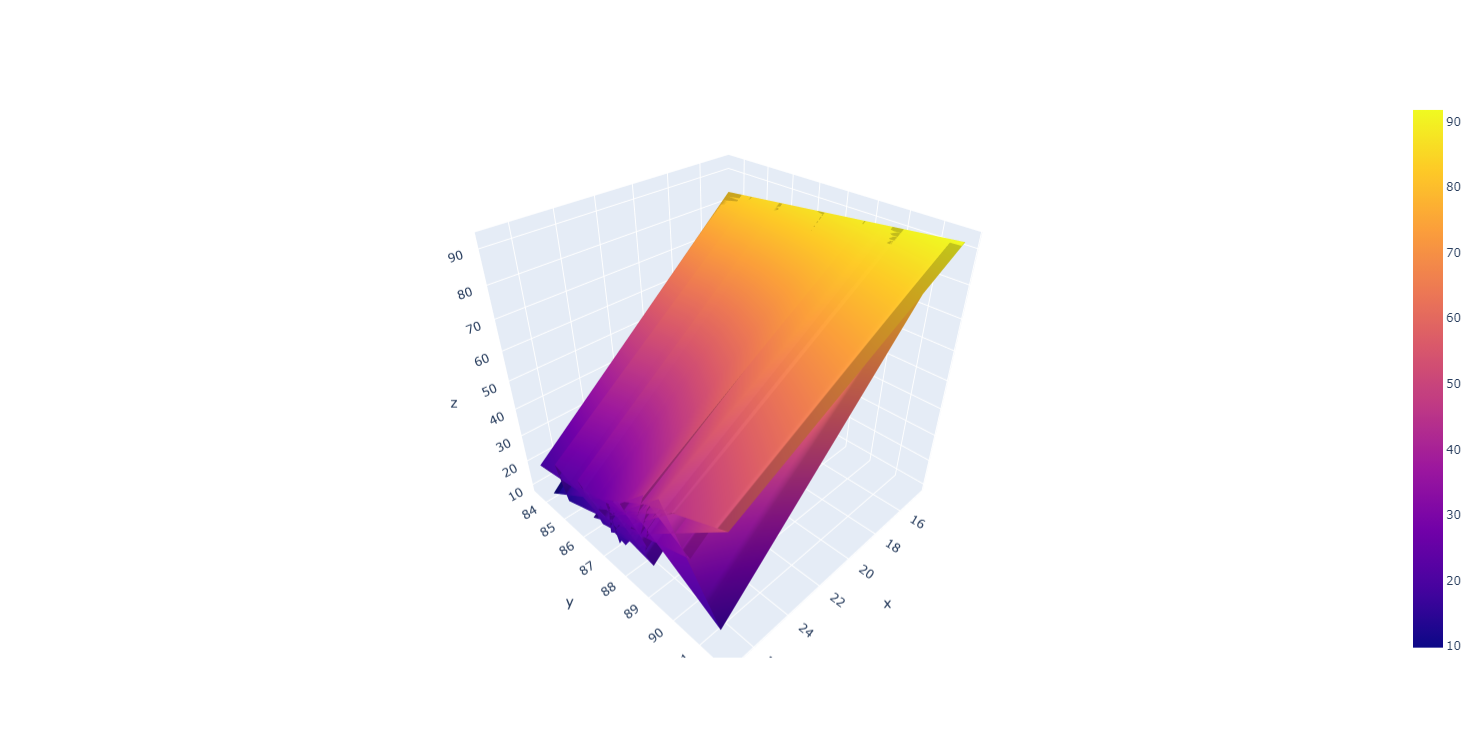

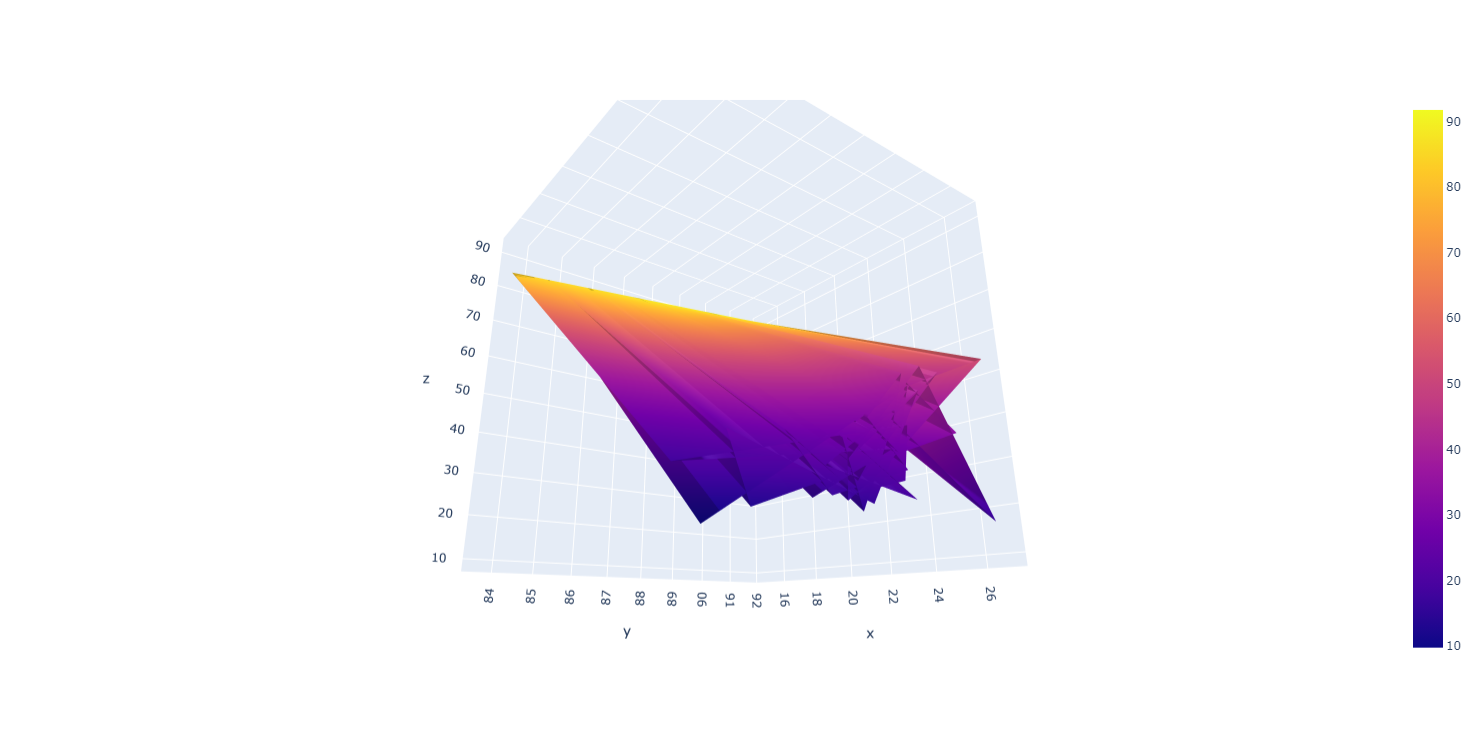

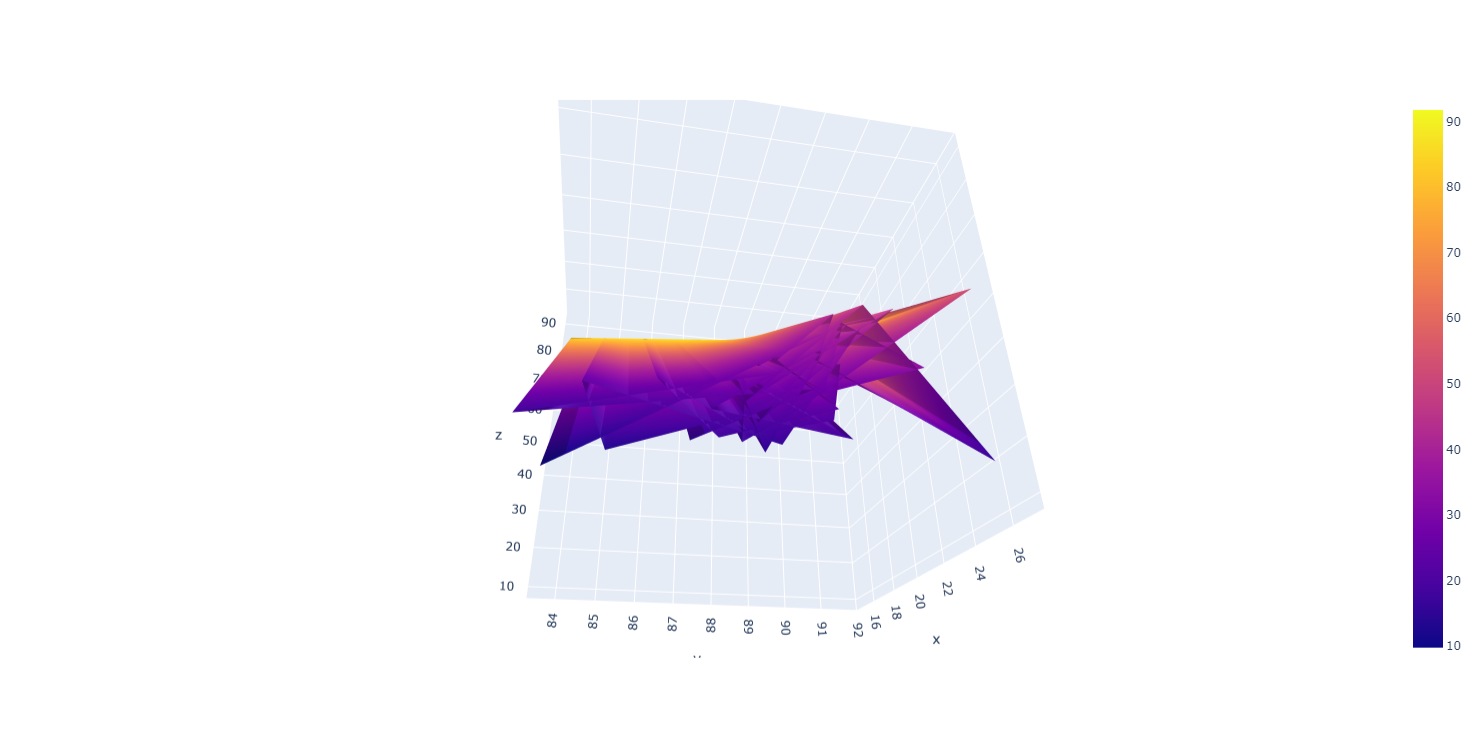

# 2nd method

In [117]:
import plotly.graph_objects as go

new_df=grouped_df[['country_counts','price','points']]

In [118]:
new_df

,country_counts,price,points
country,,,
Argentina,2655,26.999623,87.076836
Armenia,2,14.500000,87.500000
Australia,1523,41.172685,88.986868
Austria,2161,33.261453,90.480796
Bosnia and Herzegovina,1,13.000000,85.000000
Brazil,43,24.604651,84.534884
Bulgaria,88,16.068182,87.784091
Canada,156,40.211538,89.333333
Chile,3575,21.479161,86.622937


In [119]:
fig = go.Figure(data=[go.Surface(z=new_df.values)])
fig.update_layout(autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))
fig.show()

#**Reference:**
>
> https://plotly.com/python/3d-surface-plots/?utm_source=mailchimp-jan-2015&utm_medium=email&utm_campaign=generalemail-jan2015&utm_term=3D-surface-plot
>
>https://plotly.com/python/3d-surface-plots/

# 3rd method:

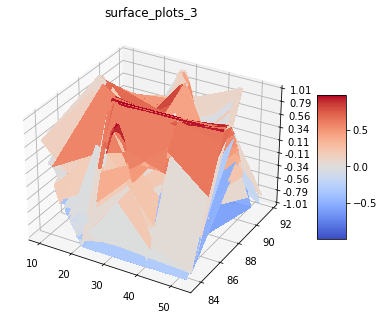

In [120]:
x=new_df['price'].values
y=new_df['points'].values

## Matplotlib Sample Code using 2D arrays via meshgrid
x, y = np.meshgrid(x, y)
R = np.sqrt(x ** 2 + y ** 2)
z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('surface_plots_3')
plt.show()

**Renfrence:**
>
>https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe